Лабораторная 3

Информация о диабете индейцев Пима

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv(".//scv//diabetes.csv")
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


Столбцы на русском:
'Pregnancies' - количество беременностей
'Glucose' - уровень глюкозы
'BloodPressure'- кровяное давление
'SkinThickness' - толщина кожи
'Insulin' - уровень инсулина
'BMI' - ИМТ
'DiabetesPedigreeFunction' - функция родословной диабета
'Age' - возраст
'Outcome' - исход

In [2]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

Объект наблюдения - здоровье пациентов

Атрибуты - содержит набор информации об обучении, такие как:
количество беременностей, глюкоза, кровяное давление, толщина кожи, ИМТ, возраст и другие атрибуты

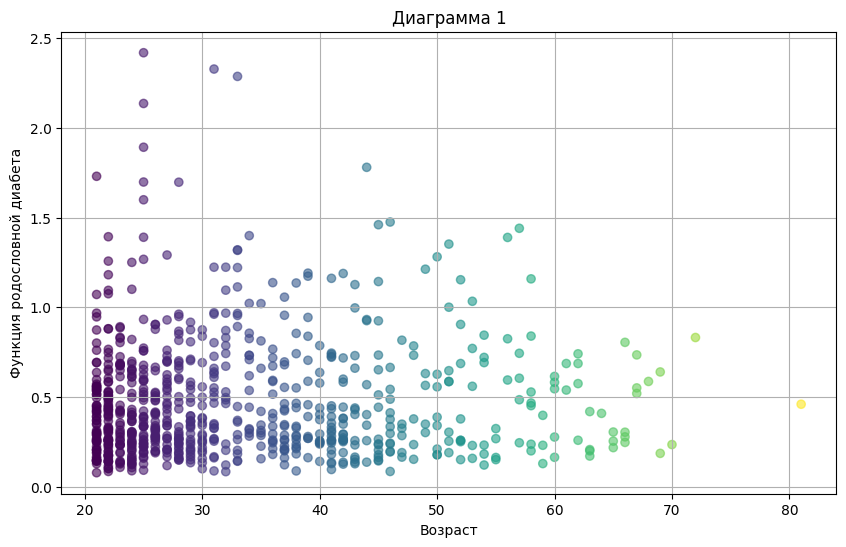

In [3]:
plt.figure(figsize=(10, 6))

plt.scatter(df['Age'], df['DiabetesPedigreeFunction'], c=df['Age'], alpha=0.6)

plt.title("Диаграмма 1")
plt.ylabel("Функция родословной диабета")
plt.xlabel("Возраст")
plt.grid(visible='true')

plt.show()

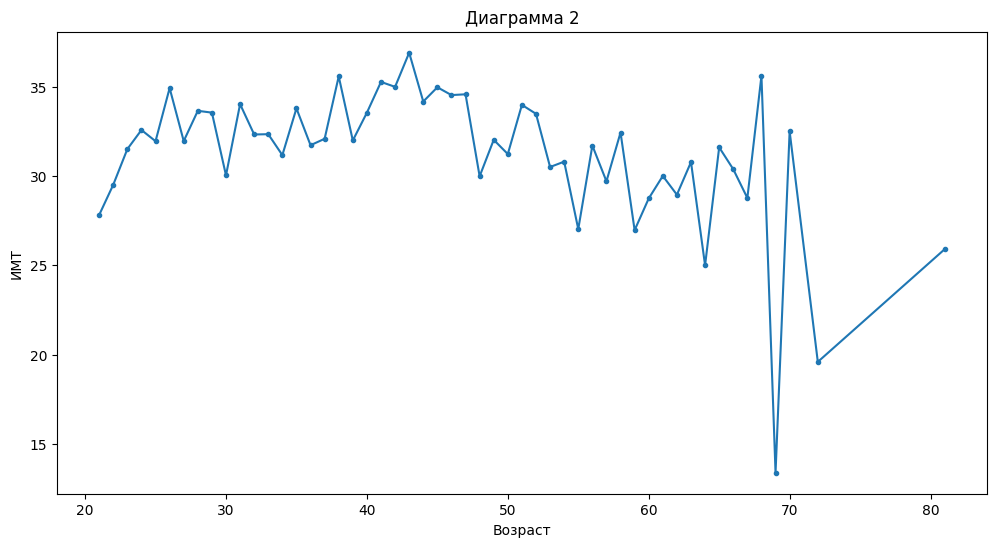

In [4]:
df_dependence = df.groupby('Age')['BMI'].mean().reset_index()

plt.figure(figsize=(12, 6))

plt.plot(df_dependence['Age'], df_dependence['BMI'], marker='.')

plt.title("Диаграмма 2")
plt.xlabel("Возраст")
plt.ylabel("ИМТ")


plt.show()

Присутствует связь между атрибутами, возраст влияет на многие атрибуты в данном датасете.
Для примера на первом графике приведена связь между функцией родословной диабета и возрастом. На втором графике показана связь возраста и ИМТ
Примеры бизнес целей

    1.Прогнозирование шанса диабета на основе функции и возраста.
    2.Улучшение диагностики диабета.
    
Эффект для бизнеса: снижение затрат на лечение, улучшение качества обслуживания.
Цели технического проекта

Для первой цели:

Вход: возраст
Целевой признак: Наличие диабета.

Для второй цели:

Вход: глюкоза, давление
Целевой признак: Наличие диабета.

Проверка на выбросы

In [5]:
null_values = df.isnull().sum()
print("Пропущенные значения по столбцам:")
print(null_values)

stat_summary = df.describe()
print("\nСтатистический обзор данных:")
print(stat_summary)


Пропущенные значения по столбцам:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Статистический обзор данных:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000

На основе данных выше можно выделить что нулевых данных нет
Также проверим данные на выбросы и дубликаты:

In [6]:
for column in df.select_dtypes(include=[np.number]).columns:
    skewness = df[column].skew()
    print(f"\nКоэффициент асимметрии для столбца '{column}': {skewness}")

duplicates = df.duplicated().sum()
print(f"\nКоличество дубликатов: {duplicates}")



Коэффициент асимметрии для столбца 'Pregnancies': 0.9016739791518588

Коэффициент асимметрии для столбца 'Glucose': 0.17375350179188992

Коэффициент асимметрии для столбца 'BloodPressure': -1.8436079833551302

Коэффициент асимметрии для столбца 'SkinThickness': 0.10937249648187608

Коэффициент асимметрии для столбца 'Insulin': 2.272250858431574

Коэффициент асимметрии для столбца 'BMI': -0.42898158845356543

Коэффициент асимметрии для столбца 'DiabetesPedigreeFunction': 1.919911066307204

Коэффициент асимметрии для столбца 'Age': 1.1295967011444805

Коэффициент асимметрии для столбца 'Outcome': 0.635016643444986

Количество дубликатов: 0


На основе данных выше можно сказать, что для столбцов выбросы незначительны. Дупликатов нет

Очистка данных от шумов:

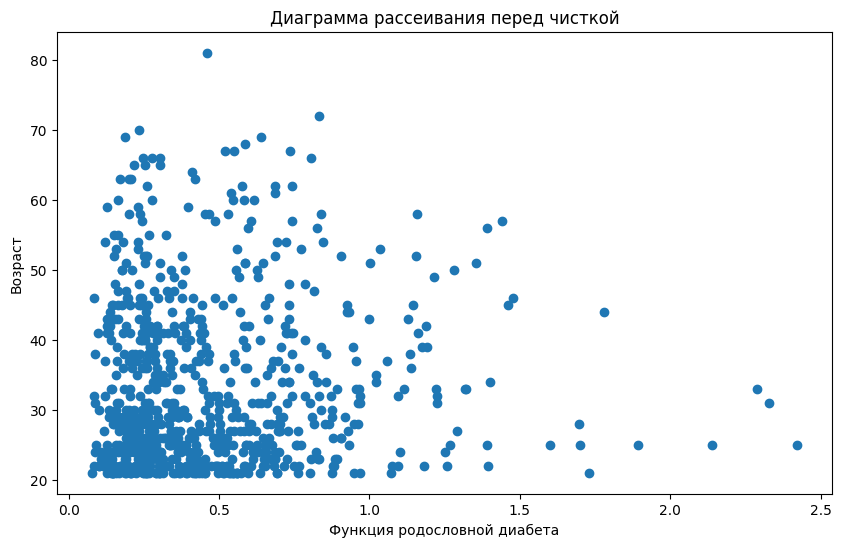

Выбросы в датасете:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
4              0      137             40             35      168  43.1   
12            10      139             80              0        0  27.1   
39             4      111             72             47      207  37.1   
45             0      180             66             39        0  42.0   
58             0      146             82              0        0  40.5   
100            1      163             72              0        0  39.0   
147            2      106             64             35      119  30.5   
187            1      128             98             41       58  32.0   
218            5       85             74             22        0  29.0   
228            4      197             70             39      744  36.7   
243            6      119             50             22      176  27.1   
245            9      184             85             15        0  30.0   
259           11  

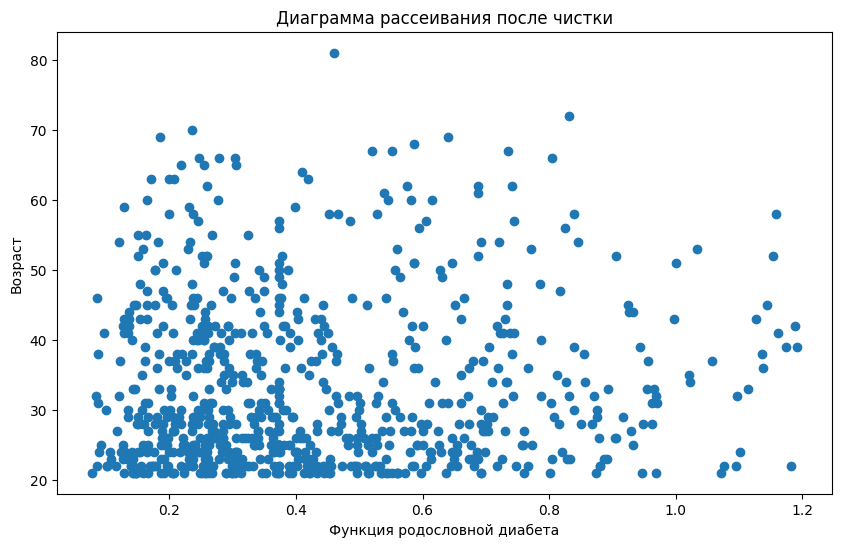

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(df['DiabetesPedigreeFunction'], df['Age'])
plt.xlabel('Функция родословной диабета')
plt.ylabel('Возраст')
plt.title('Диаграмма рассеивания перед чисткой')
plt.show()

Q1 = df["DiabetesPedigreeFunction"].quantile(0.25)
Q3 = df["DiabetesPedigreeFunction"].quantile(0.75)

IQR = Q3 - Q1

threshold = 1.5 * IQR
lower_bound = Q1 - threshold
upper_bound = Q3 + threshold

outliers = (df["DiabetesPedigreeFunction"] < lower_bound) | (df["DiabetesPedigreeFunction"] > upper_bound)

# Вывод выбросов
print("Выбросы в датасете:")
print(df[outliers])

# Заменяем выбросы на медианные значения
median_score = df["DiabetesPedigreeFunction"].median()
df.loc[outliers, "DiabetesPedigreeFunction"] = median_score

# Визуализация данных после обработки
plt.figure(figsize=(10, 6))
plt.scatter(df['DiabetesPedigreeFunction'], df['Age'])
plt.xlabel('Функция родословной диабета')
plt.ylabel('Возраст')
plt.title('Диаграмма рассеивания после чистки')
plt.show()

Разбиение набора данных на обучающую, контрольную и тестовую выборки

In [8]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

Размер обучающей выборки: 460
Размер контрольной выборки: 154
Размер тестовой выборки: 154


In [9]:
def check_balance(df, name):
    counts = df['DiabetesPedigreeFunction'].value_counts()
    print(f"Распределение функции родословной диабета в {name}:")
    print(counts)
    print()

check_balance(train_df, "обучающей выборке")
check_balance(val_df, "контрольной выборке")
check_balance(test_df, "тестовой выборке")

Распределение функции родословной диабета в обучающей выборке:
DiabetesPedigreeFunction
0.3725    12
0.2580     5
0.2990     4
0.1970     4
0.3040     4
          ..
0.6610     1
0.3980     1
0.2860     1
0.6950     1
0.3050     1
Name: count, Length: 341, dtype: int64

Распределение функции родословной диабета в контрольной выборке:
DiabetesPedigreeFunction
0.3725    10
0.1420     3
0.2540     3
0.4440     2
0.3490     2
          ..
0.2450     1
0.6930     1
0.1210     1
0.6860     1
0.1220     1
Name: count, Length: 132, dtype: int64

Распределение функции родословной диабета в тестовой выборке:
DiabetesPedigreeFunction
0.3725    7
0.5280    2
0.1480    2
0.2590    2
0.4430    2
         ..
0.2480    1
0.2360    1
0.3020    1
0.4850    1
0.7050    1
Name: count, Length: 135, dtype: int64



В датасете нет категориальных данных, hot-encoding не требуется

Используем дискретизацию

In [10]:
list_age = ["young", "middle-aged", "old"]
bins = np.linspace(0, 100, 4)
train_df['Age_Category'] = pd.cut(train_df['Age'], bins=bins, labels=list_age)
val_df['Age_Category'] = pd.cut(val_df['Age'], bins=bins, labels=list_age)
test_df['Age_Category'] = pd.cut(test_df['Age'], bins=bins, labels=list_age)
print("Обучающая выборка:\n",train_df.head(), "\n")
print("Контрольная выборка:\n",val_df.head(), "\n")
print("Тестовая выборка:\n",test_df.head())

Обучающая выборка:
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
335            0      165             76             43      255  47.9   
467            0       97             64             36      100  36.8   
51             1      101             50             15       36  24.2   
131            9      122             56              0        0  33.3   
649            0      107             60             25        0  26.4   

     DiabetesPedigreeFunction  Age  Outcome Age_Category  
335                     0.259   26        0        young  
467                     0.600   25        0        young  
51                      0.526   26        0        young  
131                     1.114   33        1        young  
649                     0.133   23        0        young   

Контрольная выборка:
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
370            3      173             82             48      465  38.4   
53       

Используем Ручной синтез, создадим новый столбец который будет говорить об опасности диабета при уровне сахара >=11

In [11]:
train_df['Glucose_Warning'] = [1 if i >= 200 else 0 for i in train_df["Glucose"]]
val_df['Glucose_Warning'] = [1 if i >= 200 else 0 for i in val_df["Glucose"]]
test_df['Glucose_Warning'] =[1 if i >= 200 else 0 for i in test_df["Glucose"]]
print("Обучающая выборка:\n",train_df.head(), "\n")
print("Контрольная выборка:\n",val_df.head(), "\n")
print("Тестовая выборка:\n",test_df.head())

Обучающая выборка:
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
335            0      165             76             43      255  47.9   
467            0       97             64             36      100  36.8   
51             1      101             50             15       36  24.2   
131            9      122             56              0        0  33.3   
649            0      107             60             25        0  26.4   

     DiabetesPedigreeFunction  Age  Outcome Age_Category  Glucose_Warning  
335                     0.259   26        0        young                0  
467                     0.600   25        0        young                0  
51                      0.526   26        0        young                0  
131                     1.114   33        1        young                0  
649                     0.133   23        0        young                0   

Контрольная выборка:
      Pregnancies  Glucose  BloodPressure  SkinThickness

Используем масштабирование

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Пример масштабирования числовых признаков
numerical_features = ['Glucose', 'BloodPressure', 'DiabetesPedigreeFunction', 'Age']

scaler = StandardScaler()
train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])
val_df[numerical_features] = scaler.transform(val_df[numerical_features])
test_df[numerical_features] = scaler.transform(test_df[numerical_features])

Используем Featuretools

In [13]:
import featuretools as ft
df['id'] = df.index
es = ft.EntitySet(id='diabet_data')
es = es.add_dataframe(dataframe_name='diabet', dataframe=df, index='id', make_index=False)
features, feature_defs = ft.dfs(entityset=es,
                                 target_dataframe_name='diabet',
                                 agg_primitives=['count', 'mean', 'sum'],
                                 verbose=True)
val_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=val_df.index)
test_feature_matrix = ft.calculate_feature_matrix(features=feature_defs, entityset=es, instance_ids=test_df.index)
print(features.head())


d:\5_semester\AIM\rep\AIM-PIbd-31-Razubaev-S-M\.venv\Lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(
d:\5_semester\AIM\rep\AIM-PIbd-31-Razubaev-S-M\.venv\Lib\site-packages\featuretools\synthesis\dfs.py:321: UnusedPrimitiveWarning: Some specified primitives were not used during DFS:
  agg_primitives: ['count', 'mean', 'sum']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible columns for the primitive were found in the data. If the DFS call contained multiple instances of a primitive in the list above, none of them were used.
  warnings.warn(warning_msg, UnusedPrimitiveWarning)


Built 9 features
Elapsed: 00:00 | Progress: 100%|██████████
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
id                                                                      
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   

    DiabetesPedigreeFunction  Age  Outcome  
id                                          
0                     0.6270   50        1  
1                     0.3510   31        0  
2                     0.6720   32        1  
3                     0.1670   21        0  
4                     0.3725   33        1  


In [14]:
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Разделение данных на обучающую и валидационную выборки. Удаляем целевую переменную
X = features.drop('Outcome', axis=1)
y = features['Outcome']

# One-hot encoding для категориальных переменных (преобразование категориальных объектов в числовые)
X = pd.get_dummies(X, drop_first=True)

# Проверяем, есть ли пропущенные значения, и заполняем их медианой или другим подходящим значением
X.fillna(X.median(), inplace=True)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = LinearRegression()

# Начинаем отсчет времени
start_time = time.time()
model.fit(X_train, y_train)

# Время обучения модели
train_time = time.time() - start_time

# Предсказания и оценка модели и вычисляем среднеквадратичную ошибку
predictions = model.predict(X_val)
mse = mean_squared_error(y_val, predictions)

print(f'Время обучения модели: {train_time:.2f} секунд')
print(f'Среднеквадратичная ошибка: {mse:.2f}')

Время обучения модели: 0.00 секунд
Среднеквадратичная ошибка: 0.17


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score


# Удаление строк с NaN
feature_matrix = features.dropna()
val_feature_matrix = val_feature_matrix.dropna()
test_feature_matrix = test_feature_matrix.dropna()

# Разделение данных на обучающую и тестовую выборки
X_train = feature_matrix.drop('Outcome', axis=1)
y_train = feature_matrix['Outcome']
X_val = val_feature_matrix.drop('Outcome', axis=1)
y_val = val_feature_matrix['Outcome']
X_test = test_feature_matrix.drop('Outcome', axis=1)
y_test = test_feature_matrix['Outcome']

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)  

# Кодирования категориальных переменных с использованием одноразового кодирования
X = pd.get_dummies(X, drop_first=True)

# Разобьём тренировочный тест и примерку модели
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Выбор модели
model = RandomForestRegressor(random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание и оценка
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print()
print(f"RMSE: {rmse}")
print(f"R²: {r2}")
print(f"MAE: {mae} \n")

# Кросс-валидация
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rmse_cv = (-scores.mean())**0.5
print(f"Кросс-валидация RMSE: {rmse_cv} \n")

# Анализ важности признаков
feature_importances = model.feature_importances_
feature_names = X_train.columns

# Проверка на переобучение
y_train_pred = model.predict(X_train)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print(f"Train RMSE: {rmse_train}")
print(f"Train R²: {r2_train}")
print(f"Train MAE: {mae_train}")
print()

d:\5_semester\AIM\rep\AIM-PIbd-31-Razubaev-S-M\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



RMSE: 0.41022087810247887
R²: 0.26704202020201995
MAE: 0.3137012987012987 

Кросс-валидация RMSE: 0.40125444539346944 

Train RMSE: 0.14832451876358646
Train R²: 0.9028956552281269
Train MAE: 0.11144951140065147



d:\5_semester\AIM\rep\AIM-PIbd-31-Razubaev-S-M\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
